# EFM NLP


In [ ]:
import panda as pd
import numpy as np                                                                  
import nltk    
data = pd.read_csv("netflix_titles.csv")
print(data.head())

In [9]:
# Sélection des 100 premières lignes du DataFrame
reviews = data. iloc[0:100, :]
# Affichage des cinq premières lignes de la sélection
reviews.head ()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [11]:
# afficher les colonnes
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
comments = reviews ["description"]
comments

0     As her father nears the end of his life, filmm...
1     After crossing paths at a party, a Cape Town t...
2     To protect his family from a powerful drug lor...
3     Feuds, flirtations and toilet talk go down amo...
4     In a city of coaching centers known to train I...
                            ...                        
95    Status and strategy collide in this social exp...
96    Using interviews and archival footage, this do...
97    A boy's superhero dreams come true when he fin...
98    The Octonauts expand their exploration beyond ...
99    Four women â€” a chef, a single mom, an heires...
Name: description, Length: 100, dtype: object

In [14]:
comments.head()

0    As her father nears the end of his life, filmm...
1    After crossing paths at a party, a Cape Town t...
2    To protect his family from a powerful drug lor...
3    Feuds, flirtations and toilet talk go down amo...
4    In a city of coaching centers known to train I...
Name: description, dtype: object

In [15]:
comments.shape

(100,)

In [16]:
comments.info()

<class 'pandas.core.series.Series'>
RangeIndex: 100 entries, 0 to 99
Series name: description
Non-Null Count  Dtype 
--------------  ----- 
100 non-null    object
dtypes: object(1)
memory usage: 932.0+ bytes


In [23]:
print(data.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


### Nettoyage

In [26]:
import pandas as pd
import re

# Définition de la fonction de nettoyage de texte
def clean_comment(text):
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'RT\s+', '', text)  # Remove 'RT' at the beginning of retweets
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces and trim text
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)  # Remove special characters
    return text

# Appliquer la fonction de nettoyage à chaque élément de la série
cleaned_comments = comments.apply(clean_tweet)

# Affichage des commentaires nettoyés
print(cleaned_comments)


0     As her father nears the end of his life filmma...
1     After crossing paths at a party a Cape Town te...
2     To protect his family from a powerful drug lor...
3     Feuds flirtations and toilet talk go down amon...
4     In a city of coaching centers known to train I...
                            ...                        
95    Status and strategy collide in this social exp...
96    Using interviews and archival footage this doc...
97    A boys superhero dreams come true when he find...
98    The Octonauts expand their exploration beyond ...
99    Four women  a chef a single mom an heiress and...
Name: description, Length: 100, dtype: object


In [27]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Télécharger les ressources nécessaires de NLTK si ce n'est pas déjà fait
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def tokenize_and_pos_tag(text):
    comments = word_tokenize(text)
    pos_tags = pos_tag(comments)
    return pos_tags

pos_tagged_comments = cleaned_comments.apply(tokenize_and_pos_tag)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\think'\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\think'\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
Vous obtenez 'pos_tagged_comments', une série pandas où chaque élément est une liste de tuples. 
Chaque tuple contient un mot du commentaire et son étiquette de partie du discours.

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialisation du CountVectorizer en ignorant les mots vides anglais
bog_vectorizer = CountVectorizer(stop_words='english')

# Apprentissage du vocabulaire à partir des commentaires nettoyés
bog_vectorizer.fit(cleaned_comments)

# Extraction du vocabulaire appris
cmmnts = bog_vectorizer.vocabulary_

# Affichage du vocabulaire
print(cmmnts)

{'father': 349, 'nears': 645, 'end': 305, 'life': 561, 'filmmaker': 361, 'kirsten': 537, 'johnson': 514, 'stages': 885, 'death': 247, 'inventive': 502, 'comical': 192, 'ways': 1033, 'help': 436, 'face': 338, 'inevitable': 482, 'crossing': 231, 'paths': 691, 'party': 687, 'cape': 139, 'town': 968, 'teen': 939, 'sets': 826, 'prove': 739, 'privateschool': 733, 'swimming': 922, 'star': 887, 'sister': 849, 'abducted': 11, 'birth': 107, 'protect': 737, 'family': 343, 'powerful': 722, 'drug': 289, 'lord': 573, 'skilled': 852, 'thief': 953, 'mehdi': 606, 'expert': 331, 'team': 937, 'robbers': 787, 'pulled': 740, 'violent': 1025, 'deadly': 246, 'turf': 992, 'war': 1030, 'feuds': 357, 'flirtations': 373, 'toilet': 963, 'talk': 932, 'incarcerated': 479, 'women': 1052, 'orleans': 673, 'justice': 524, 'center': 150, 'new': 649, 'gritty': 418, 'reality': 756, 'series': 822, 'city': 171, 'coaching': 182, 'centers': 151, 'known': 539, 'train': 974, 'indias': 481, 'finest': 366, 'collegiate': 186, 'min

# Representation graphique


## One-hot encoding
Le one-hot encoding est une technique de représentation des données souvent utilisée dans l'apprentissage automatique et le traitement du langage naturel pour convertir des variables catégorielles en un format que les algorithmes peuvent comprendre et utiliser directement.

C:\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


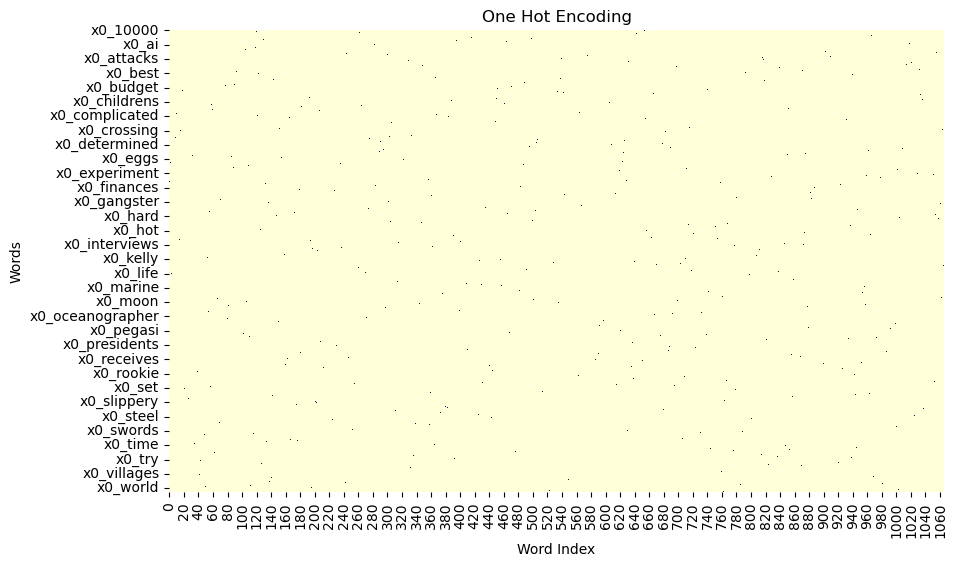

In [33]:
from sklearn.preprocessing import OneHotEncoder

# Combiner tous les mots de tous les tweets en une seule liste
all_words = [word for cmmnt in cmmnts for word in cmmnt.split()]

# One Hot Encoding
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot = one_hot_encoder.fit_transform([[word] for word in all_words])

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Créer une DataFrame pour la visualisation
df_one_hot = pd.DataFrame(one_hot, columns=one_hot_encoder.get_feature_names_out())

plt.figure(figsize=(10, 6))
sns.heatmap(df_one_hot.T, cmap='YlGnBu', cbar=False)
plt.xlabel('Word Index')
plt.ylabel('Words')
plt.title('One Hot Encoding')
plt.show()


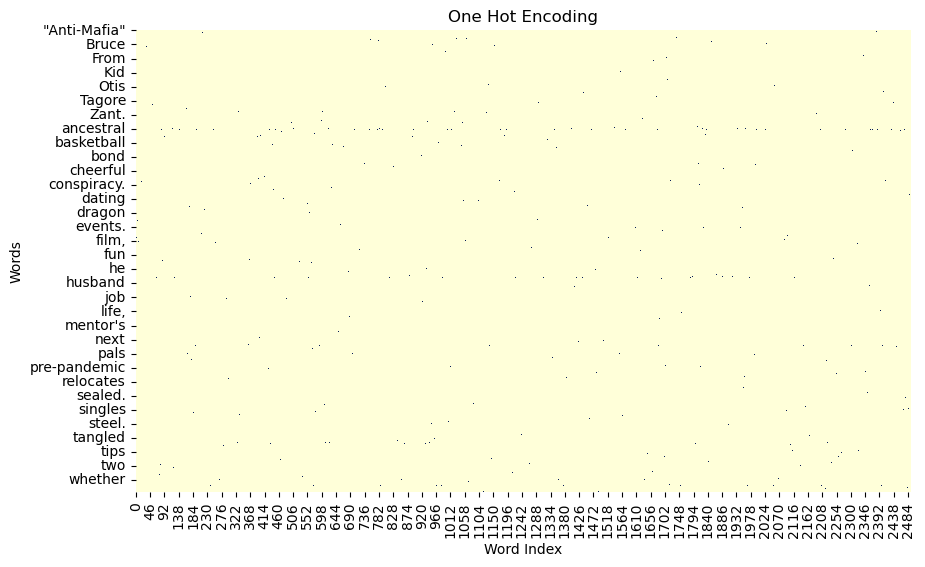

In [34]:
from sklearn.preprocessing import LabelBinarizer

# Combiner tous les mots de tous les tweets en une seule liste
all_words = [word for comment in comments for word in comment.split()]

# One Hot Encoding
lb = LabelBinarizer()
one_hot = lb.fit_transform(all_words)

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Créer une DataFrame pour la visualisation
df_one_hot = pd.DataFrame(one_hot, columns=lb.classes_)

plt.figure(figsize=(10, 6))
sns.heatmap(df_one_hot.T, cmap='YlGnBu', cbar=False)
plt.xlabel('Word Index')
plt.ylabel('Words')
plt.title('One Hot Encoding')
plt.show()


In [35]:
from sklearn.feature_extraction.text import CountVectorizer
bog_vectorizer = CountVectorizer()
bog_vectorizer.fit(cmmnts)
print(bog_vectorizer.vocabulary_)

{'father': 349, 'nears': 645, 'end': 305, 'life': 561, 'filmmaker': 361, 'kirsten': 537, 'johnson': 514, 'stages': 885, 'death': 247, 'inventive': 502, 'comical': 192, 'ways': 1033, 'help': 436, 'face': 338, 'inevitable': 482, 'crossing': 231, 'paths': 691, 'party': 687, 'cape': 139, 'town': 968, 'teen': 939, 'sets': 826, 'prove': 739, 'privateschool': 733, 'swimming': 922, 'star': 887, 'sister': 849, 'abducted': 11, 'birth': 107, 'protect': 737, 'family': 343, 'powerful': 722, 'drug': 289, 'lord': 573, 'skilled': 852, 'thief': 953, 'mehdi': 606, 'expert': 331, 'team': 937, 'robbers': 787, 'pulled': 740, 'violent': 1025, 'deadly': 246, 'turf': 992, 'war': 1030, 'feuds': 357, 'flirtations': 373, 'toilet': 963, 'talk': 932, 'incarcerated': 479, 'women': 1052, 'orleans': 673, 'justice': 524, 'center': 150, 'new': 649, 'gritty': 418, 'reality': 756, 'series': 822, 'city': 171, 'coaching': 182, 'centers': 151, 'known': 539, 'train': 974, 'indias': 481, 'finest': 366, 'collegiate': 186, 'min

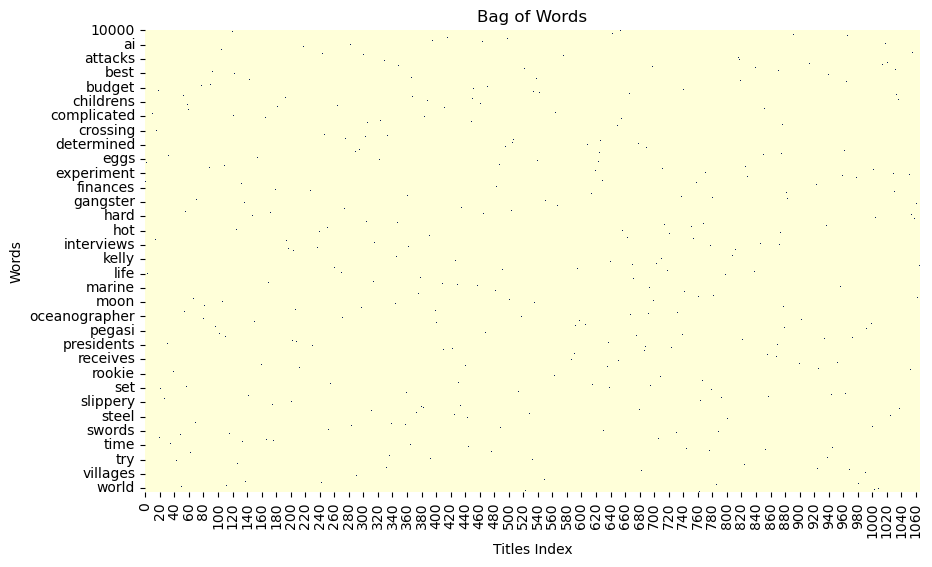

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

# Bag of Words
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(cmmnts)

# Visualisation
df_bow = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())

plt.figure(figsize=(10, 6))
sns.heatmap(df_bow.T, cmap='YlGnBu', cbar=False)
plt.xlabel('Titles Index')
plt.ylabel('Words')
plt.title('Bag of Words')
plt.show()


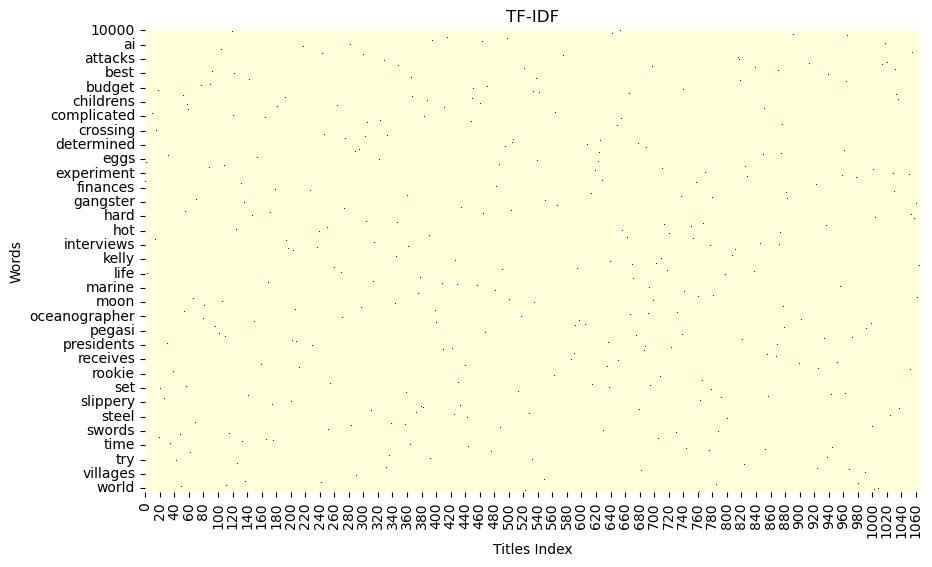

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(twts)

# Visualisation
data_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

plt.figure(figsize=(10, 6))
sns.heatmap(data_tfidf.T, cmap='YlGnBu', cbar=False)
plt.xlabel('Titles Index')
plt.ylabel('Words')
plt.title('TF-IDF')
plt.show()


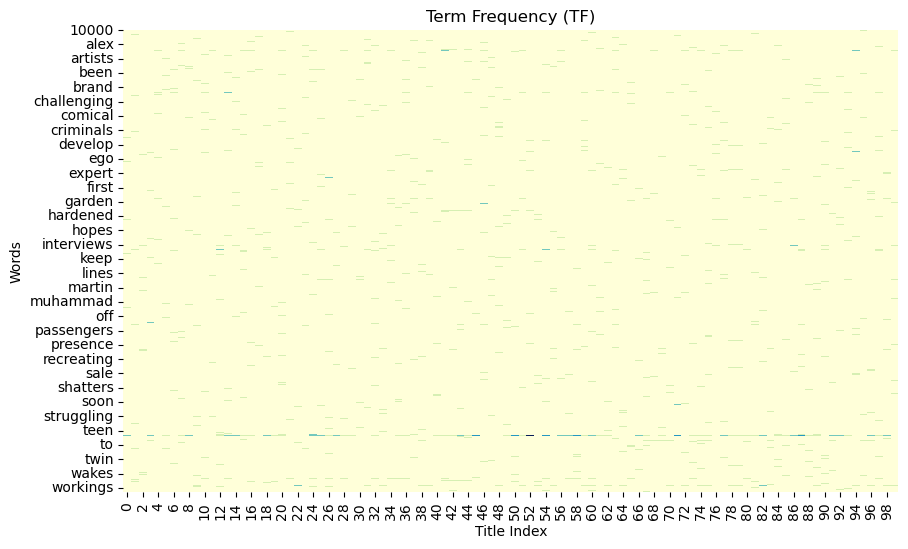

In [48]:
# Term Frequency (TF)
tf_vectorizer = CountVectorizer()
X_tf = tf_vectorizer.fit_transform(cleaned_comments)

# Visualisation
data_tf = pd.DataFrame(X_tf.toarray(), columns=tf_vectorizer.get_feature_names_out())

plt.figure(figsize=(10, 6))
sns.heatmap(data_tf.T, cmap='YlGnBu', cbar=False)
plt.xlabel('Title Index')
plt.ylabel('Words')
plt.title('Term Frequency (TF)')
plt.show()


# Clustering et Analyse

Le clustering est un outil puissant pour analyser et organiser des données sans étiquettes. En découvrant des structures cachées dans les données, il aide à extraire des informations utiles et à prendre des décisions basées sur des groupes naturels identifiés dans le jeu de données.

In [49]:
#BOW
from sklearn.cluster import KMeans

# Créer un objet KMeans
kmeans = KMeans(n_clusters=5, random_state=42)

# Effectuer le clustering
kmeans.fit(X_bow)

# Assigner les clusters aux données
clusters_bow = kmeans.predict(X_bow)

# Afficher les clusters
print(clusters_bow)


C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 0 0 ... 0 0 0]


In [50]:
# Effectuer le clustering avec TF-IDF
kmeans.fit(X_tfidf)

# Assigner les clusters aux données TF-IDF
clusters_tfidf = kmeans.predict(X_tfidf)

# Afficher les clusters
print(clusters_tfidf)


[0 0 0 ... 0 0 0]


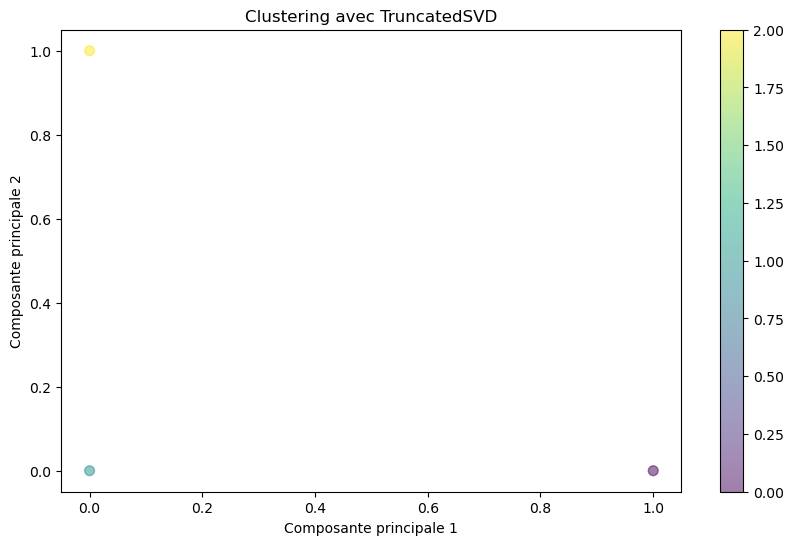

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans

# Vectorisation avec TfidfVectorizer (n-grams)
vectorizer_ngram = TfidfVectorizer(ngram_range=(1, 2))
X_ngram = vectorizer_ngram.fit_transform(data['Cleaned Review Text'])

# Clustering KMeans
n_clusters = min(3, X_ngram.shape[0])  # Le nombre de clusters ne doit pas être supérieur au nombre d'échantillons
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

kmeans.fit(X_ngram)

# Assigner les clusters aux données n-gram
clusters_ngram = kmeans.predict(X_ngram)

# Réduction de dimension avec TruncatedSVD
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_ngram)

# Visualiser les clusters avec TruncatedSVD
plt.figure(figsize=(10, 6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=clusters_ngram, cmap='viridis', s=50, alpha=0.5)
plt.title('Clustering avec TruncatedSVD')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.colorbar()
plt.show()


### Analyse exploratoire des données (EDA) :

L'analyse exploratoire de données est une étape essentielle pour comprendre la structure et les caractéristiques d'un jeu de données avant de procéder à des analyses plus avancées. Elle permet d'identifier les tendances, les anomalies, et les relations entre les variables, facilitant ainsi la prise de décisions informées et la préparation adéquate des données pour des modèles prédictifs.

In [58]:
# Exemple de statistiques sur la longueur des comments
comments_lengths = [len(str(comments)) for comment in cmmnts.values()]
print("Longueur moyenne des titres:", np.mean(comments_lengths))
print("Longueur maximale des titres:", np.max(comments_lengths))




Longueur moyenne des titres: 661.0
Longueur maximale des titres: 661


### Evaluation :

In [94]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


In [59]:
cleaned_comments

0     As her father nears the end of his life filmma...
1     After crossing paths at a party a Cape Town te...
2     To protect his family from a powerful drug lor...
3     Feuds flirtations and toilet talk go down amon...
4     In a city of coaching centers known to train I...
                            ...                        
95    Status and strategy collide in this social exp...
96    Using interviews and archival footage this doc...
97    A boys superhero dreams come true when he find...
98    The Octonauts expand their exploration beyond ...
99    Four women  a chef a single mom an heiress and...
Name: description, Length: 100, dtype: object

In [61]:
data = pd.DataFrame(cleaned_comments, columns=['description'])
data.reset_index(inplace=True)
data.rename(columns={'index': 'id'}, inplace=True)
print(data.head())

   id                                        description
0   0  As her father nears the end of his life filmma...
1   1  After crossing paths at a party a Cape Town te...
2   2  To protect his family from a powerful drug lor...
3   3  Feuds flirtations and toilet talk go down amon...
4   4  In a city of coaching centers known to train I...


#### EDA

In [62]:
# Statistiques descriptives
print(data.describe())

# Recherche de valeurs manquantes
print(data.isnull().sum())

# Exemple de statistiques sur la longueur des tweets
comment_lengths = data['description'].apply(len)
print("Longueur moyenne des comments:", comment_lengths.mean())
print("Longueur maximale des comments:", comment_lengths.max())
print("Longueur minimale des comments:", comment_lengths.min())

               id
count  100.000000
mean    49.500000
std     29.011492
min      0.000000
25%     24.750000
50%     49.500000
75%     74.250000
max     99.000000
id             0
description    0
dtype: int64
Longueur moyenne des comments: 142.07
Longueur maximale des comments: 151
Longueur minimale des comments: 116


#### Factorisation des données

In [63]:
# Utilisation de la fonction cat.codes pour le codage de catégorie
data['id'] = data['id'].astype('category').cat.codes
print(data.head())


   id                                        description
0   0  As her father nears the end of his life filmma...
1   1  After crossing paths at a party a Cape Town te...
2   2  To protect his family from a powerful drug lor...
3   3  Feuds flirtations and toilet talk go down amon...
4   4  In a city of coaching centers known to train I...


#### Utilisation du DataFrame pour l'analyse exploratoire

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

# Statistiques descriptives
print(data.describe())

# Exemple de statistiques sur la longueur des tweets
comment_lengths = data['description'].apply(len)
print("Longueur moyenne des messages:", comment_lengths.mean())
print("Longueur maximale des messages:", comment_lengths.max())
print("Longueur minimale des messages:", tcomment_lengths.min())

# Visualisation de la distribution des longueurs de tweets
sns.histplot(comment_lengths, bins=20, kde=True)
plt.title('Distribution des longueurs de messages')
plt.xlabel('Longueur des messages')
plt.ylabel('Fréquence')
plt.show()


Longueur moyenne des messages: 142.07
Longueur maximale des messages: 151
Longueur minimale des messages: 116


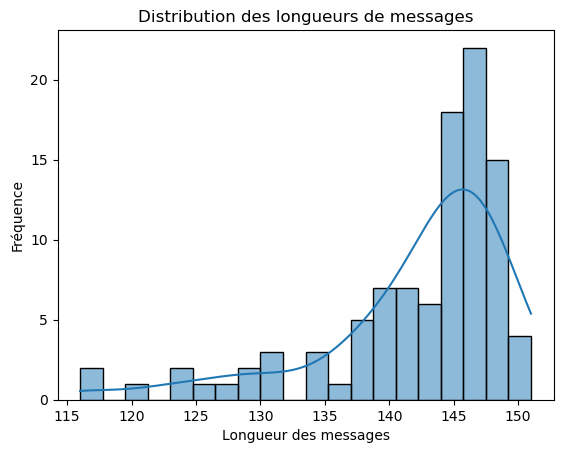

In [68]:

# Exemple de statistiques sur la longueur des comments
comment_lengths = data['description'].apply(len)
print("Longueur moyenne des messages:", comment_lengths.mean())
print("Longueur maximale des messages:", comment_lengths.max())
print("Longueur minimale des messages:", comment_lengths.min())

# Visualisation de la distribution des longueurs des comments
sns.histplot(comment_lengths, bins=20, kde=True)
plt.title('Distribution des longueurs de messages')
plt.xlabel('Longueur des messages')
plt.ylabel('Fréquence')
plt.show()


### Création du nuage de mots

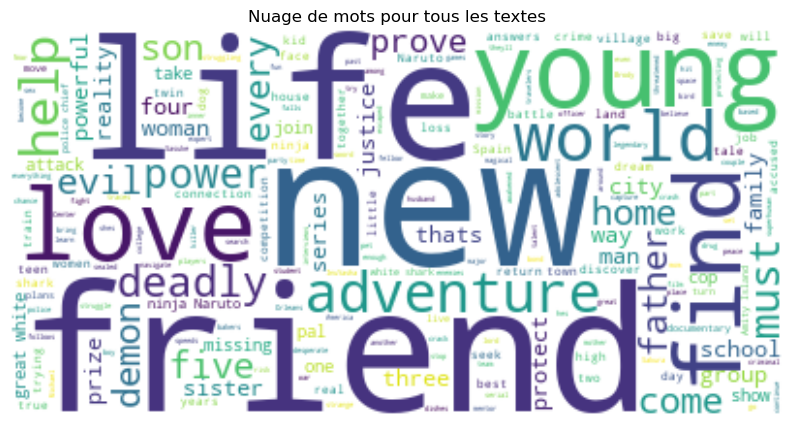

In [69]:
# Supprimer les stopwords et créer le nuage de mots
stopwords = set(STOPWORDS)

# Nuage de mots pour tous les textes
all_words = ' '.join([text for text in data['description']])
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(all_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots pour tous les textes')
plt.show()


In [74]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Télécharger les ressources nécessaires pour VADER
nltk.download('vader_lexicon')



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\think'\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [96]:
# Créer un DataFrame avec un index
data_cleaned = pd.DataFrame(cleaned_comments, columns=['description'])
data_cleaned.reset_index(inplace=True)
data_cleaned.rename(columns={'index': 'id'}, inplace=True)

# Initialiser l'analyseur de sentiments VADER
sid = SentimentIntensityAnalyzer()

# Fonction pour générer des labels basés sur le score de sentiment VADER
def generate_label_vader(comment):
    score = sid.polarity_scores(comment)
    if score['compound'] >= 0.05:
        return 1  # Sentiment positif
    elif score['compound'] <= -0.05:
        return 0  # Sentiment négatif
    else:
        return np.nan  # Sentiment neutre ou indéterminé

# Ajouter les labels au DataFrame
data_cleaned['label'] = data_cleaned['description'].apply(generate_label_vader)

# Filtrer les tweets avec labels incertains
data_cleaned = data_cleaned.dropna(subset=['label'])

# Convertir les labels en entiers
data_cleaned['label'] = data_cleaned['label'].astype(int)

# Séparer les tweets positifs et négatifs
positive_comments = data_cleaned[data_cleaned['label'] == 1]
negative_comments = data_cleaned[data_cleaned['label'] == 0]



Exemples de comments positifs:
3    Feuds flirtations and toilet talk go down amon...
4    In a city of coaching centers known to train I...
5    The arrival of a charismatic young priest brin...
6    Equestrias divided But a brighteyed hero belie...
8    A talented batch of amateur bakers face off in...
Name: description, dtype: object

Exemples de comments négatifs:
0    As her father nears the end of his life filmma...
1    After crossing paths at a party a Cape Town te...
2    To protect his family from a powerful drug lor...
7    On a photo shoot in Ghana an American model sl...
9    A woman adjusting to life after a loss contend...
Name: description, dtype: object

Statistiques des longueurs des comments positifs:
count     45.000000
mean     141.800000
std        8.049845
min      116.000000
25%      140.000000
50%      144.000000
75%      147.000000
max      151.000000
Name: description, dtype: float64

Statistiques des longueurs des comments négatifs:
count     46.000000
mean 

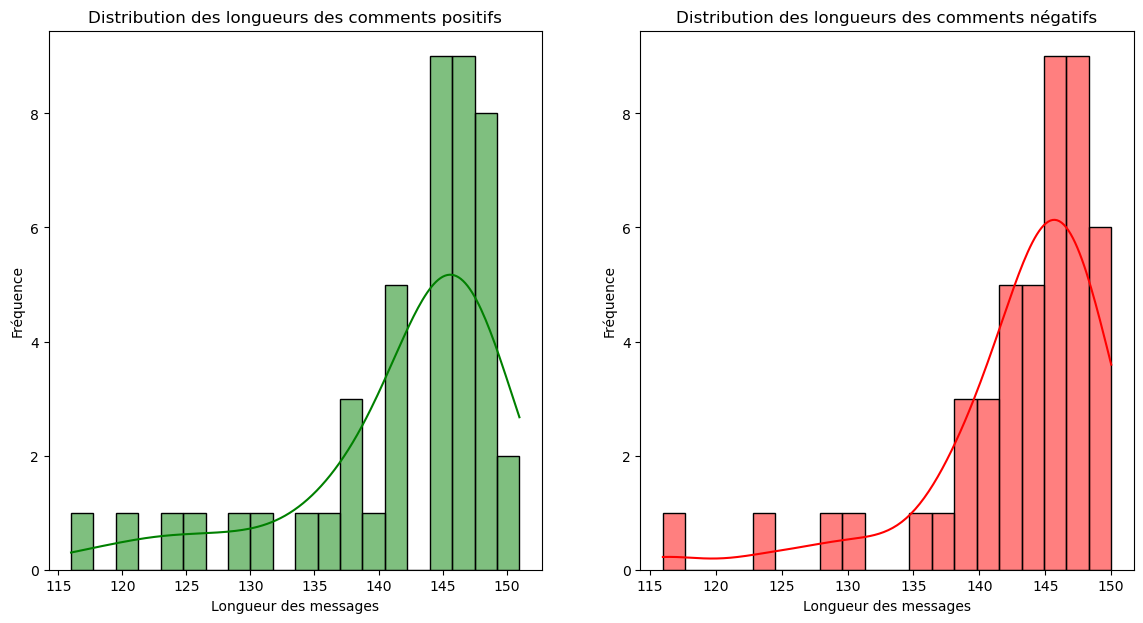

In [97]:
# Affichage de quelques tweets positifs et négatifs pour vérification
print("Exemples de comments positifs:")
print(positive_comments['description'].head())

print("\nExemples de comments négatifs:")
print(negative_comments['description'].head())

# Statistiques sur les longueurs des tweets positifs et négatifs
positive_lengths = positive_comments['description'].apply(len)
negative_lengths = negative_comments['description'].apply(len)

print("\nStatistiques des longueurs des comments positifs:")
print(positive_lengths.describe())

print("\nStatistiques des longueurs des comments négatifs:")
print(negative_lengths.describe())

# Visualisation de la distribution des longueurs de tweets
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.histplot(positive_lengths, bins=20, kde=True, color='green')
plt.title('Distribution des longueurs des comments positifs')
plt.xlabel('Longueur des messages')
plt.ylabel('Fréquence')

plt.subplot(1, 2, 2)
sns.histplot(negative_lengths, bins=20, kde=True, color='red')
plt.title('Distribution des longueurs des comments négatifs')
plt.xlabel('Longueur des messages')
plt.ylabel('Fréquence')

plt.show()

In [99]:
# Affichage de quelques tweets positifs et négatifs pour vérification
print("Exemples de comments positifs:")
print(positive_comments['description'].head())

print("\nExemples de comments négatifs:")
print(negative_comments['description'].head())

# Statistiques sur les longueurs des tweets positifs et négatifs
positive_lengths = positive_comments['description'].apply(len)
negative_lengths = negative_comments['description'].apply(len)

print("\nStatistiques des longueurs des comments positifs:")
print(positive_lengths.describe())

print("\nStatistiques des longueurs des comments négatifs:")
print(negative_lengths.describe())


Exemples de comments positifs:
3    Feuds flirtations and toilet talk go down amon...
4    In a city of coaching centers known to train I...
5    The arrival of a charismatic young priest brin...
6    Equestrias divided But a brighteyed hero belie...
8    A talented batch of amateur bakers face off in...
Name: description, dtype: object

Exemples de comments négatifs:
0    As her father nears the end of his life filmma...
1    After crossing paths at a party a Cape Town te...
2    To protect his family from a powerful drug lor...
7    On a photo shoot in Ghana an American model sl...
9    A woman adjusting to life after a loss contend...
Name: description, dtype: object

Statistiques des longueurs des comments positifs:
count     45.000000
mean     141.800000
std        8.049845
min      116.000000
25%      140.000000
50%      144.000000
75%      147.000000
max      151.000000
Name: description, dtype: float64

Statistiques des longueurs des comments négatifs:
count     46.000000
mean 

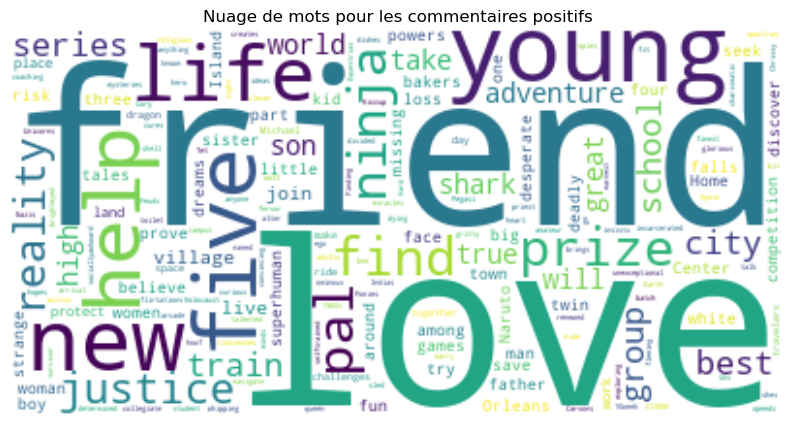

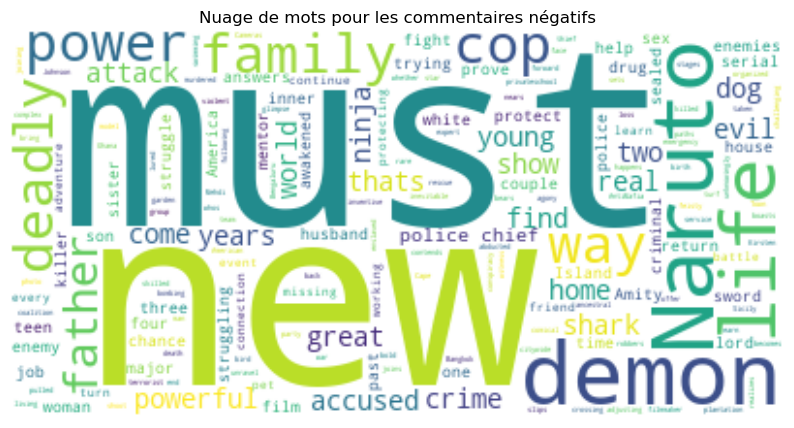

In [101]:
# Créer des nuages de mots pour chaque catégorie
stopwords = set(STOPWORDS)

# Nuage de mots pour les comments positifs
positive_words_text = ' '.join(positive_comments['description'])
wordcloud_positive = WordCloud(stopwords=stopwords, background_color='white').generate(positive_words_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots pour les commentaires positifs')
plt.show()

# Nuage de mots pour les comments négatifs
negative_words_text = ' '.join(negative_comments['description'])
wordcloud_negative = WordCloud(stopwords=stopwords, background_color='white').generate(negative_words_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots pour les commentaires négatifs')
plt.show()

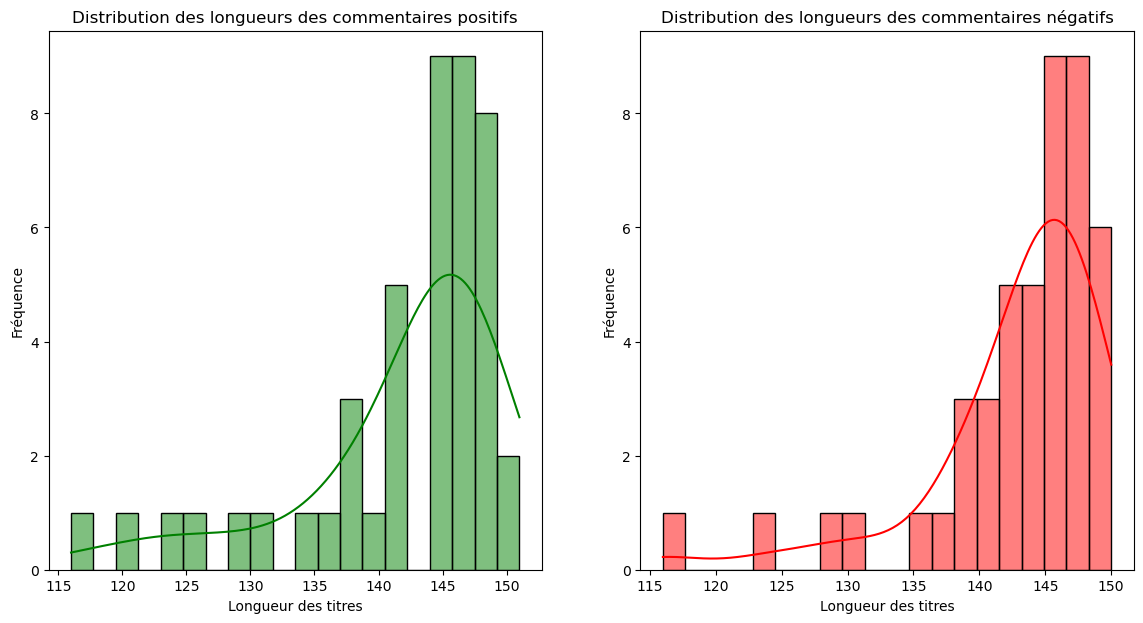

In [102]:
# Visualisation de la distribution des longueurs des commentaires 
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.histplot(positive_lengths, bins=20, kde=True, color='green')
plt.title('Distribution des longueurs des commentaires positifs')
plt.xlabel('Longueur des titres')
plt.ylabel('Fréquence')

plt.subplot(1, 2, 2)
sns.histplot(negative_lengths, bins=20, kde=True, color='red')
plt.title('Distribution des longueurs des commentaires négatifs')
plt.xlabel('Longueur des titres')
plt.ylabel('Fréquence')

plt.show()

La figure montre deux histogrammes côte à côte, chacun représentant la distribution des longueurs des commentaires positifs et négatifs. Voici une analyse détaillée de cette visualisation :

  1.Distribution des Longueurs des Commentaires Positifs (à gauche) :

Histogramme Vert : L'histogramme est coloré en vert pour indiquer les commentaires positifs.

Observations :
La distribution semble centrée autour d'une certaine longueur moyenne, avec une majorité de commentaires ayant des longueurs similaires.
La courbe KDE (Kernel Density Estimation) superposée indique la densité de probabilité, fournissant une estimation plus lisse de la distribution.

  2.Distribution des Longueurs des Commentaires Négatifs (à droite) :

Histogramme Rouge : L'histogramme est coloré en rouge pour indiquer les commentaires négatifs.

Observations :
La distribution des longueurs des commentaires négatifs montre également une concentration autour d'une longueur moyenne, bien que les caractéristiques exactes peuvent varier par rapport aux commentaires positifs.
La courbe KDE superposée fournit une estimation plus lisse de la distribution.
Comparaison et Interprétation

###Comparaison des Distributions :

La comparaison des deux histogrammes permet d'observer les différences et similitudes dans les longueurs des commentaires positifs et négatifs.
Si les distributions sont similaires, cela peut indiquer que la longueur des commentaires n'est pas fortement influencée par le sentiment. En revanche, des différences significatives peuvent suggérer une variation de la longueur en fonction du sentiment.

###Utilisation des Informations :

Cette visualisation est utile pour comprendre les caractéristiques des commentaires en fonction de leur sentiment.
En résumé, cette figure fournit un aperçu visuel des longueurs des commentaires en fonction de leur sentiment, facilitant l'analyse des caractéristiques textuelles en relation avec les émotions exprimées.






